In [ ]:
"""
Created on Mon May 16 19:00:32 2022
@author: Ajit Johnson Nirmal
SCIMAP tutorial May 2022
"""

In [1]:
# load packages
import scimap as sm
import scanpy as sc
import pandas as pd
import anndata as ad

In [2]:
common_path = "/Users/aj/Dropbox (Partners HealthCare)/conferences/scimap_tutorial/may_2022_tutorial/"
#common_path = "C:/Users/ajn16/Dropbox (Partners HealthCare)/conferences/scimap_tutorial/may_2022_tutorial/"

In [ ]:
# load data
#adata = sm.pp.mcmicro_to_scimap (image_path= str(common_path) + 'exemplar_001/quantification/unmicst-exemplar-001_cell.csv')
#manual_gate = pd.read_csv(str(common_path) + 'manual_gates.csv')
#adata = sm.pp.rescale (adata, gate=manual_gate)
#phenotype = pd.read_csv(str(common_path) + 'phenotype_workflow.csv')
#adata = sm.tl.phenotype_cells (adata, phenotype=phenotype, label="phenotype") 
# add user defined ROI's before proceeding

In [3]:
# load saved anndata object
adata = ad.read(str(common_path) + 'may2022_tutorial.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 11170 × 9
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'imageid', 'phenotype', 'index_info', 'ROI', 'ROI_individual'
    uns: 'all_markers', 'dendrogram_phenotype'

### Investigate cell-type composition within the ROI's

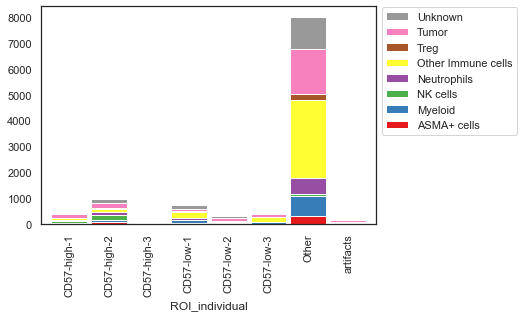

In [5]:
# https://scimap.xyz/All%20Functions/C.%20Plotting/sm.pl.stacked_barplot/
sm.pl.stacked_barplot (adata,
                       x_axis='ROI_individual',
                       y_axis='phenotype',
                       method='absolute')

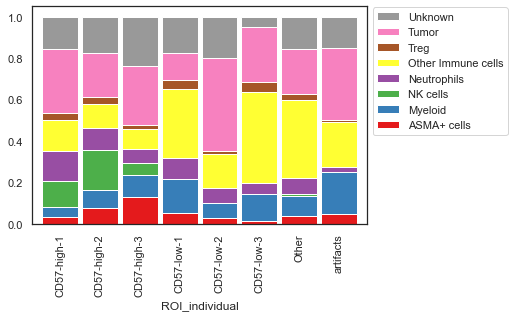

In [6]:
# Plot the number of cells normalized to 100% 
sm.pl.stacked_barplot (adata,
                       x_axis='ROI_individual',
                       y_axis='phenotype',
                       method='percent')

In [7]:
# specify the elements to be in the plot
x_axis_elements = ['CD57-low-1', 'CD57-low-2', 'CD57-low-3', 'CD57-high-2', 'CD57-high-1', 'CD57-high-3']
y_axis_elements = ['ASMA+ cells', 'Myeloid', 'NK cells', 'Neutrophils', 'Other Immune cells', 'Treg', 'Tumor']

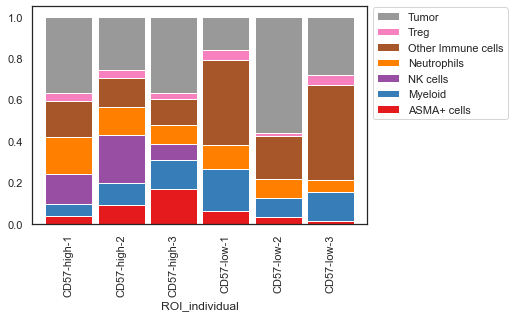

In [8]:
# replot
sm.pl.stacked_barplot (adata,
                       x_axis='ROI_individual',
                       y_axis='phenotype',
                       method='percent',
                       subset_xaxis=x_axis_elements,
                       subset_yaxis=y_axis_elements)

In [9]:
# quiet a number of parameters to play around:
sm.pl.stacked_barplot (adata, 
                x_axis='ROI_individual', y_axis='phenotype', 
                subset_xaxis=x_axis_elements, subset_yaxis=y_axis_elements, 
                order_xaxis=None, order_yaxis=None, 
                method='percent', plot_tool='plotly', 
                matplotlib_cmap=None, 
                matplotlib_bbox_to_anchor=(1, 1.02), 
                matplotlib_legend_loc=2, 
                return_data=False)

### Calculate the fold change in cell types between the different ROI's

In [10]:
adata = sm.tl.foldchange (adata, 
                          from_group=['CD57-low-1', 'CD57-low-2', 'CD57-low-3'], 
                          to_group=None, 
                          imageid='ROI_individual', 
                          phenotype='phenotype',
                          normalize=True, 
                          subset_phenotype=None, 
                          label='foldchange')

/opt/anaconda3/envs/scimap/lib/python3.9/site-packages/scimap/tools/_foldchange.py:102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/envs/scimap/lib/python3.9/site-packages/scimap/tools/_foldchange.py:103: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/envs/scimap/lib/python3.9/site-packages/scimap/tools/_foldchange.py:104: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

calculating P values


In [11]:
adata

AnnData object with n_obs × n_vars = 11170 × 9
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'imageid', 'phenotype', 'index_info', 'ROI', 'ROI_individual'
    uns: 'all_markers', 'dendrogram_phenotype', 'foldchange_pval', 'foldchange_fc'

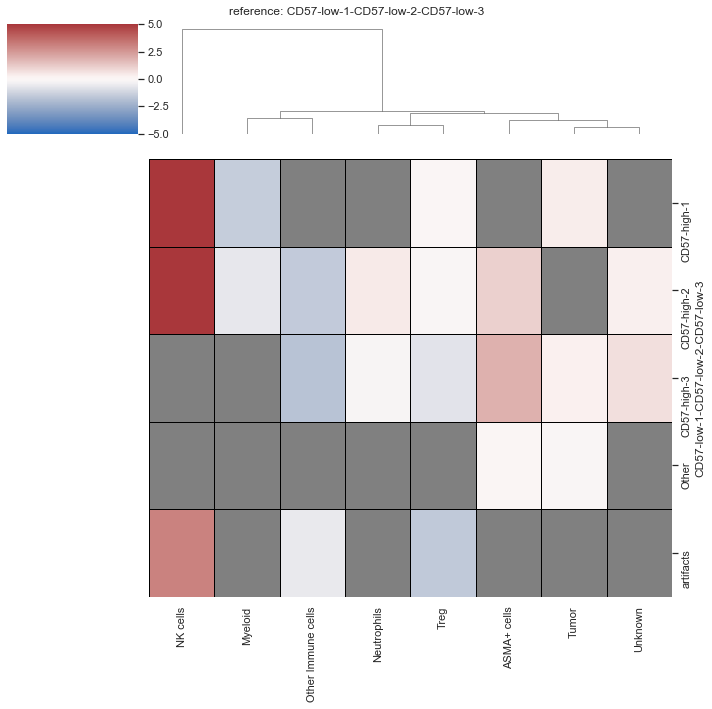

In [12]:
# Heatmap of foldchnage  
sm.pl.foldchange (adata, label='foldchange', method='heatmap',
                     p_val=0.05, nonsig_color='grey',
                     cmap = 'vlag', log=True, center=0, linecolor='black',linewidths=0.7,
                     vmin=-5, vmax=5, row_cluster=False)

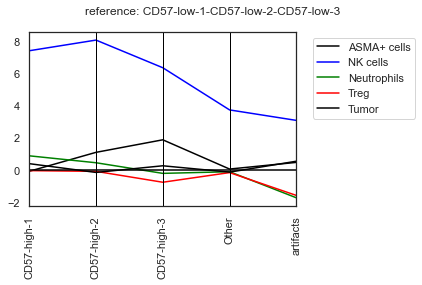

In [13]:
# Parallel_coordinates plot of the foldchanges
sm.pl.foldchange (adata, label='foldchange', 
                  subset_xaxis = ['ASMA+ cells', 'NK cells', 'Neutrophils', 'Treg', 'Tumor'],
                log=True, method='parallel_coordinates', invert_axis=True,
                parallel_coordinates_color=['black','blue','green','red','#000000'],
                matplotlib_bbox_to_anchor=(1.04,1),
                matplotlib_legend_loc='upper left',
                xticks_rotation=90,
                return_data = False)

In [14]:
# save adata
adata.write(str(common_path) + 'may2022_tutorial.h5ad')